# Just trying to achieve segmentation on all images


In [1]:
#loading of the packages
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy import signal
import scipy.misc
import imageio
import skimage.io
from skimage import morphology
from skimage import filters
from skimage import transform
from skimage import draw
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import random
import pandas as pd
import sys
import time
import pickle
import importlib
import pywt
import matplotlib.patches as patches
#custom packages
function_dir = os.path.join(os.pardir, 'Functions')
sys.path.append(function_dir)

import segmentation as seg
importlib.reload(seg) #to make sure the last version of seg is used

<module 'segmentation' from '..\\Functions\\segmentation.py'>

In [7]:
#Data from Q:
data_base_path = os.path.join('R:','3.Masters_projects','2021_Dominic_Rebindaine')
#data_base_path = os.path.join(os.pardir, 'Datasets')
#data_folder = os.path.join('Aquascope','raw_only')
data_folder = os.path.join('20211116_Eudorina_1','20211116_Eudorina_1_150')
data_path = os.path.join(data_base_path, data_folder)

In [8]:
importlib.reload(seg) #to make sure the last version of seg is used
t0 = time.perf_counter()
mean_img, hist = seg.stat_aquisition_from_file(data_path)
t1 = time.perf_counter()
print("Time taken for preprocessing "+str(t1-t0))

Time taken for preprocessing 47.586135600000034


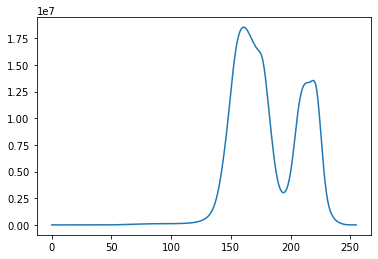

In [9]:
plt.plot(hist)

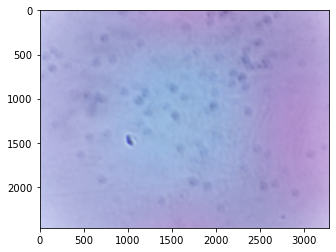

In [10]:
plt.imshow(mean_img/255)

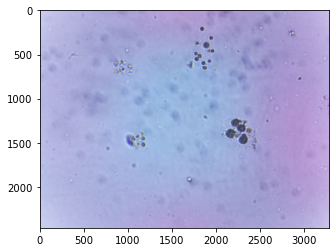

In [31]:
i = 2
img_path = os.path.join(data_path,os.listdir(data_path)[i])
img = skimage.io.imread(img_path)
plt.imshow(img)

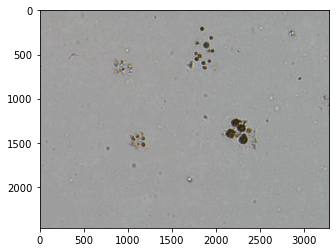

In [20]:
img_meanless = seg.normalize(img-mean_img)
plt.imshow(img_meanless)

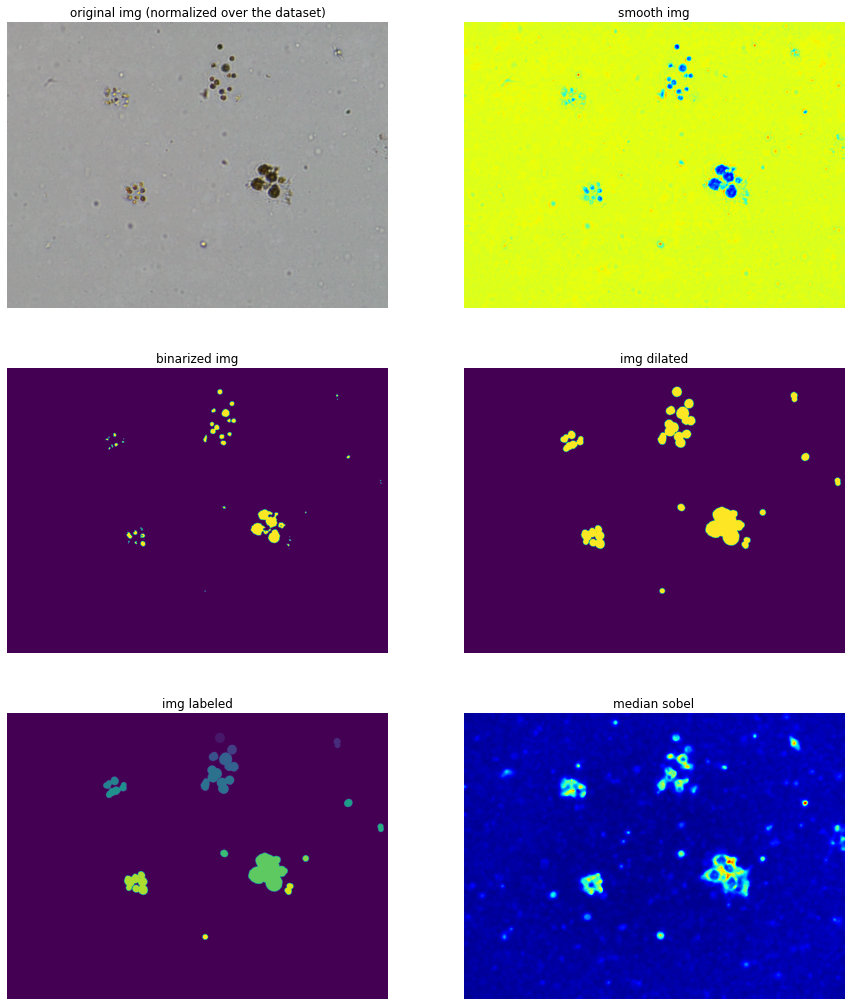

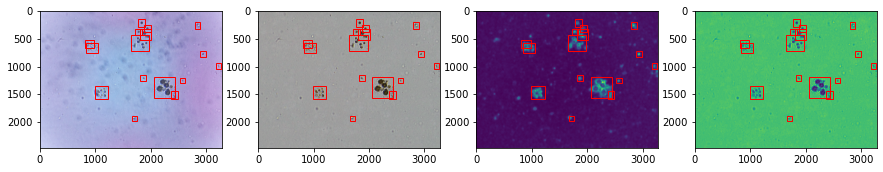

In [21]:
importlib.reload(seg) #to make sure the last version of seg is used

label,sobel,smooth = seg.label_standard(img_meanless, 0.4,shrink_factor=2, dil_size = 24, sigma = 7,
                   timed = 0,sobel_factor=10, plot=True,return_features=True)
ROImc, corners, mask = seg.multichannel_segment([img,img_meanless,sobel,smooth], label,plot =True,margin = 20,
                                      return_mask=True, return_corners = True)


Bundles containing informations about the images are created, but no images are saved.

In [22]:
bundle_list = []
for i in range(len(mask)):
    bundle ={}
    bundle['img source'] = img_path
    bundle['xmin']= corners[i][0][0]
    bundle['xmax']= corners[i][1][0]
    bundle['ymin']=corners[i][0][1]
    bundle['ymax']=corners[i][1][1]
    bundle['area']=np.sum(mask[0])
    bundle['sharpness'] = np.max(ROImc[i][2]).astype(int)
    bundle_list.append(bundle)

The ROI can be retrieved by using code such as this one:

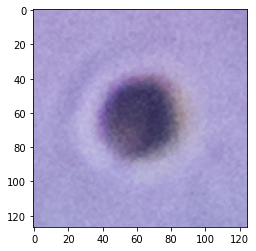

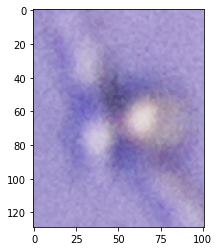

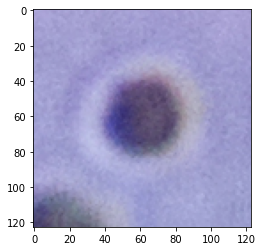

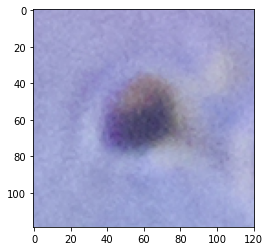

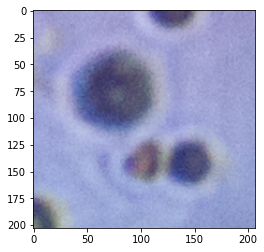

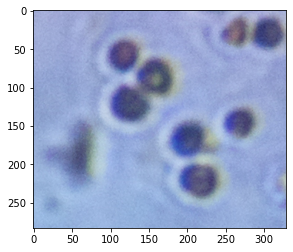

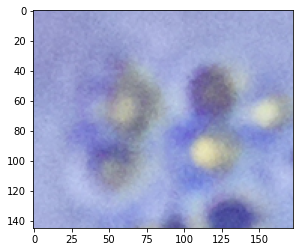

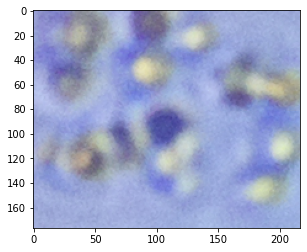

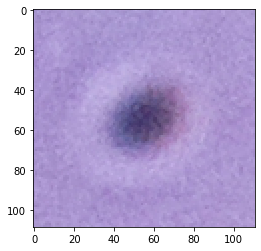

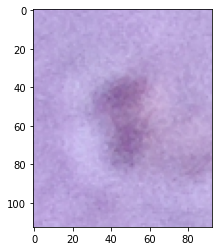

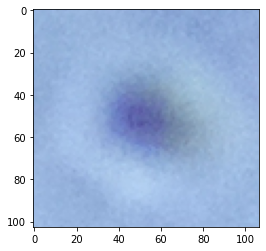

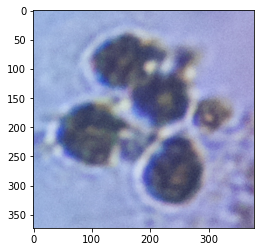

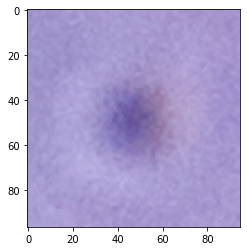

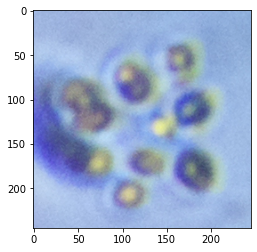

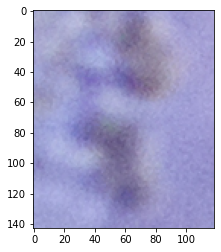

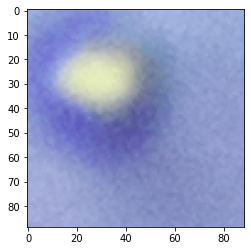

In [30]:
bundle = bundle_list[5]
fig,ax = plt.subplot((len(bundle_list)//4),4,figsize=(100,18))
ax.ravel()
for i,bundle in enumerate(bundle_list):
    img_ROI = skimage.io.imread(bundle['img source'])
    ROI = img_ROI[bundle['xmin']:bundle['xmax'],bundle['ymin']:bundle['ymax']]
    ax[i].imshow(ROI)
    
plt.show()

The whole dataset is parsed in this way in the script "segment_from_file.py", and the ROI as well as the mean images are stored on Q:

In [12]:
bundle_address = os.path.join('Q:','Eco','Gabriel','Bundles')
with open(os.path.join(bundle_address,'bundle_list_22.pickle'), 'rb') as f:
    bundle_list = pickle.load(f) 
print("There are "+str(len(bundle_list))+" ROI segmented")

There are 16753 ROI segmented


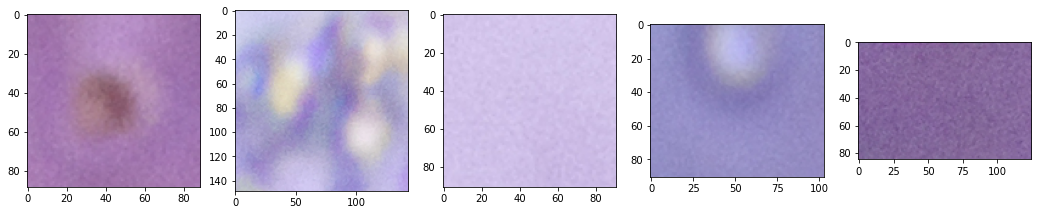

In [13]:
#pick n random one and plot them:
n = 5
rnd = np.random.randint(0,len(bundle_list),n)
fig,ax = plt.subplots(1,n,figsize=(18,18))
for i,idx in enumerate(rnd):
    bundle = bundle_list[idx]
    img_ROI = skimage.io.imread(bundle['img source'])
    ROI = img_ROI[bundle['xmin']:bundle['xmax'],bundle['ymin']:bundle['ymax']]
    ax[i].imshow(ROI)
plt.show()

The result is then compared with the one obtained by using the default plancktoscope segmenter:

In [3]:
function_dir = os.path.join(os.pardir, 'PlanktoScope','scripts')
sys.path.append(function_dir)
import planktoscope as plk
from planktoscope import segmenter
import planktoscope.uuidName 
from planktoscope.segmenter import streamer
import multiprocessing
importlib.reload(segmenter)

2021-11-16 12:19:46.804 | INFO     | planktoscope.mqtt:<module>:60 - planktoscope.mqtt is loaded
2021-11-16 12:19:46.858 | INFO     | planktoscope.segmenter:<module>:59 - planktoscope.segmenter is loaded
2021-11-16 12:19:46.861 | INFO     | planktoscope.segmenter:<module>:59 - planktoscope.segmenter is loaded


<module 'planktoscope.segmenter' from '..\\PlanktoScope\\scripts\\planktoscope\\segmenter\\__init__.py'>

In [4]:
event = multiprocessing.Event()
for i in range(10):
    rnd_path = os.path.join(data_base_path, np.random.choice(os.listdir(data_base_path)))
    rnd_aqu = os.path.join(rnd_path, np.random.choice(os.listdir(rnd_path)))
    rnd_img_name = os.path.join(rnd_aqu, np.random.choice(os.listdir(rnd_aqu)))
    #check if the "image" is not the integritycheck
    if rnd_img_name[-4:]=='.jpg':
        print("image chosen: "+str(rnd_img_name))
        break
img = skimage.io.imread(rnd_img_name)


image chosen: Q:Eco\dominic\20211104_Greifensee_zoo_1\20211104_Greifensee_zoo_1_134\11_33_27_680224.jpg


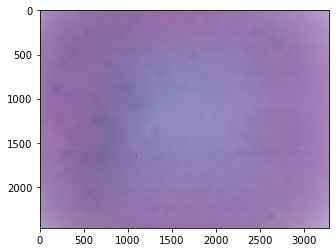

In [5]:
plt.imshow(img)


In [6]:
data_path = os.path.join(os.pardir, 'Datasets','Plancktoscope','20211101_pond2_1')
segProcess = segmenter.SegmenterProcess(event,data_path)

2021-11-16 12:19:50.553 | INFO     | planktoscope.segmenter:__init__:77 - planktoscope.segmenter is initialising
2021-11-16 12:19:50.556 | SUCCESS  | planktoscope.segmenter:__init__:117 - planktoscope.segmenter is initialised and ready to go!


In [7]:
data_base_path = os.path.join(os.pardir, 'Datasets')
#data_folder = os.path.join('Aquascope','raw_only')
data_folder = os.path.join('Plancktoscope','20211101_pond2_1','img','20211101_pond2_1_113')#os.path.join('20211104_Greifensee_1','20211104_Greifensee_1_125')
img_path = os.path.join(data_base_path, data_folder)

In [8]:
segProcess.segmenter_client = planktoscope.mqtt.MQTT_Client(
            topic="segmenter/#", name="segmenter_client"
        )

2021-11-16 12:19:50.615 | INFO     | planktoscope.mqtt:connect:88 - trying to connect to 127.0.0.1:1883
2021-11-16 12:19:52.645 | ERROR    | planktoscope.mqtt:__init__:84 - An error has been caught in function '__init__', process 'MainProcess' (2492), thread 'MainThread' (5368):
Traceback (most recent call last):

  File "C:\Users\valla\Anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x000002302F1E59D0, file "C:\Users\valla\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 1>
           └ <function _run_code at 0x000002302F23D550>

  File "C:\Users\valla\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython ker

In [9]:

force = True
ecotaxa_export = True
path = img_path

segProcess.segment_list([path],force,ecotaxa_export)


2021-11-16 12:19:53.800 | INFO     | planktoscope.segmenter:segment_list:746 - The pipeline will be run in 1 directories
2021-11-16 12:19:53.802 | DEBUG    | planktoscope.segmenter:segment_list:747 - Those are ['..\\Datasets\\Plancktoscope\\20211101_pond2_1\\img\\20211101_pond2_1_113']
2021-11-16 12:19:53.808 | INFO     | planktoscope.segmenter:segment_list:756 - The process_uuid of this run is 1f3fb00e-46cf-11ec-8b5f-174578902468
2021-11-16 12:19:53.809 | INFO     | planktoscope.segmenter:segment_list:757 - The process_id of this run is 1f3fb00e-46cf-11ec-8b5f-174578902468
2021-11-16 12:19:53.810 | DEBUG    | planktoscope.segmenter:segment_list:761 - ..\Datasets\Plancktoscope\20211101_pond2_1\img\20211101_pond2_1_113: Checking for the presence of metadata.json
2021-11-16 12:19:53.810 | INFO     | planktoscope.segmenter:segment_path:805 - Loading the metadata file for ..\Datasets\Plancktoscope\20211101_pond2_1\img\20211101_pond2_1_113
2021-11-16 12:19:53.812 | DEBUG    | planktoscope.s

2021-11-16 12:19:58.408 | SUCCESS  | planktoscope.segmenter.operations:erode:87 - Erode calc
2021-11-16 12:19:58.468 | INFO     | planktoscope.segmenter.operations:dilate:100 - Dilate calc
2021-11-16 12:19:58.479 | SUCCESS  | planktoscope.segmenter.operations:dilate:109 - Dilate calc
2021-11-16 12:19:58.546 | INFO     | planktoscope.segmenter.operations:close:122 - Close calc
2021-11-16 12:19:58.565 | SUCCESS  | planktoscope.segmenter.operations:close:131 - Close calc
2021-11-16 12:19:58.630 | INFO     | planktoscope.segmenter.operations:erode2:144 - Erode calc 2
2021-11-16 12:19:58.641 | SUCCESS  | planktoscope.segmenter.operations:erode2:153 - Erode calc 2
2021-11-16 12:19:58.696 | SUCCESS  | planktoscope.segmenter:_create_mask:258 - Mask created
2021-11-16 12:19:58.815 | DEBUG    | planktoscope.segmenter:_slice_image:473 - Found 656 labels, or 75 after size filtering
2021-11-16 12:19:58.862 | DEBUG    | planktoscope.segmenter:_stream:420 - Sending the object in the pipe!
2021-11-16 

2021-11-16 12:19:58.873 | ERROR    | planktoscope.segmenter:segment_list:769 - There was an error while segmenting ..\Datasets\Plancktoscope\20211101_pond2_1\img\20211101_pond2_1_113


UnboundLocalError: local variable 'e' referenced before assignment

In [ ]:
img_path.split(os.path.join(data_path,'img'))[1].strip()

In [ ]:
print(sys.executable)

In [ ]:
segProcess._open_and_apply_flat(rnd_img_name, flat_ref)

In [11]:
np.__version__

'1.21.2'